##### klasifikasi menggunakan logistik regresi pada data https://www.kaggle.com/datasets/hb20007/gender-classification. Metrik pengukuran harus mencakup nilai akurasi, confusion matriks, atau yg lain

###### Import Semua Library / Modul yang dibutuhkan

In [3]:
# Memanggil semua library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

###### Mengambil Dataset dari file CSV

In [4]:
# mengambil Dataset dari file CSV
df = pd.read_csv("Transformed Data Set - Sheet1.csv")
# menampilkan 5 Data Pertama pada Dataset
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [5]:
# menghasilkan statistik seperti count,mean,unique dll
df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


In [6]:
# Menampilkan informasi tentang DataFrame seperti Range,Total Column, DType, dan NonNull 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [7]:
# memeriksa dan menjumlahkan data null 
df.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [8]:
# Melihat Jumlah Data Gender memastikan data seimbang / sama jumlahnya
num_female = df['Gender'].value_counts()['F']
num_male = df['Gender'].value_counts()['M']
print(f'Jumlah Female (F): {num_female}')
print(f'Jumlah Male (M): {num_male}')

Jumlah Female (F): 33
Jumlah Male (M): 33


###### Split Dataset

In [9]:
# Memisahkan fitur dan target || X sebagai Fitur dan y sebagain Target
# kita bisa gunakan ini jika ingin mengambil beberapa fitur saja
#X = df[['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink']]
# tapi karna kita pakai semua fitur yg ada maka gunakan get_dummies dan menghapus kolom Gendernya
X = df.drop(['Gender'],axis=1)
# kita ambil gender sebagai Target
Y = df['Gender']

# mengetahui bentuk (shape) , ada baris dan kolom
print("Jumlah Fitur :",X.shape)
print("Jumlah Target :",Y.shape)


Jumlah Fitur : (66, 4)
Jumlah Target : (66,)


In [10]:
# Membagi data menjadi data latih dan data uji dari library sklearn.model_selection
# test_size=0.2 , data latih 20% dan 80% data latih

X_train, X_test, y_train , y_test = train_test_split(X,Y, test_size=0.2, random_state=0) 

###### Encode Dataset

In [11]:
# sebelum memasukan dataset sebagai model di regresi logistik , kita perlu melakukan encode terlebih dulu
# regresi logistik membutuhkan nilai numerik
# inisiasi labelEncoder dan disimpan ke label_encoders
label_encoders = {}
# me looping setiap kolom X_train
for column in X_train.columns:
    # membuat objek LabelEncoder baru 
    label = LabelEncoder()
    # melakukan encoding pada kolom X_train dan menyimpannya
    X_train[column] = label.fit_transform(X_train[column])
    # melakukan encoding pada kolom X_test dengan objek LabelEncoder yang sama
    X_test[column] = label.transform(X_test[column])
    # menyimpan objek LabelEncoder ke dalam dictionary label_encoders
    label_encoders[column] = label

In [13]:
# melihat hasil encode 
for column, encoder in label_encoders.items():
    print(f"Encoded values for {column}:")
    for label, code in zip(encoder.classes_, encoder.transform(encoder.classes_)):
        print(f"  {label} -> {code}")

Encoded values for Favorite Color:
  Cool -> 0
  Neutral -> 1
  Warm -> 2
Encoded values for Favorite Music Genre:
  Electronic -> 0
  Folk/Traditional -> 1
  Hip hop -> 2
  Jazz/Blues -> 3
  Pop -> 4
  R&B and soul -> 5
  Rock -> 6
Encoded values for Favorite Beverage:
  Beer -> 0
  Doesn't drink -> 1
  Other -> 2
  Vodka -> 3
  Whiskey -> 4
  Wine -> 5
Encoded values for Favorite Soft Drink:
  7UP/Sprite -> 0
  Coca Cola/Pepsi -> 1
  Fanta -> 2
  Other -> 3


In [14]:
# Gabungkan X dan y yang sudah diencode
X_encoded = pd.concat([X, Y], axis=1)
# Simpan dataset yang sudah diencode ke dalam file CSV
X_encoded.to_csv('encoded_Transformed Data Set - Sheet1.csv', index=False)

###### Create Model LogisticRegression

In [15]:

# Membuat dan melatih model Regresi Logistik
model = LogisticRegression()
# melatih data latih dan target dari data latih
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Melihat Nilai Koefisien dari setiap fitur
print(model.coef_)

[[-0.26000166 -0.17362339 -0.11955988  0.19735981]]


In [17]:
# Melakukan prediksi dengan model Regresi Logistik pada data uji X_test
y_pred = pd.Series(model.predict(X_test))
# Mereset indeks dari y_test agar sesuai dengan indeks hasil prediksi y_pred
y_test = y_test.reset_index(drop=True)
# Menggabungkan y_test dan y_pred secara berdampingan dalam satu DataFrame
z = pd.concat([y_test, y_pred], axis=1)
# Memberi nama kolom pada DataFrame hasil penggabungan
z.columns = ["true", "predict"]
# Mencetak 10 baris pertama dari DataFrame z, yang berisi nilai sebenarnya dan nilai prediksi
print(z.head(10))

  true predict
0    M       M
1    F       M
2    F       M
3    M       M
4    M       M
5    F       F
6    M       F
7    M       F
8    M       M
9    F       F


In [18]:
# test output prediksi gender secara manual 
prediction = model.predict([[0,6,3,0]]) #[Cool,Rock,Vodka,7UP/Sprite]
print("gender prediction : ",prediction)

gender prediction :  ['F']


c:\Users\afriz\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


###### Mengukur kinerja Model

In [19]:
# Menghitung dan mencetak akurasi dari model
print("Akurasi : ", metrics.accuracy_score(y_test, y_pred))

# Menghitung dan mencetak nilai precision (presisi) untuk kelas Female
print("Presisi Gender Female : ", metrics.precision_score(y_test, y_pred, pos_label='F'))
# Menghitung dan mencetak seberapa baik model berjalan untuk kelas Female
print('Recall Gender Female : ', metrics.recall_score(y_test, y_pred, pos_label='F'))

# Menghitung dan mencetak precision (presisi) untuk kelas Male
print("Presisi Gender Male : ", metrics.precision_score(y_test, y_pred, pos_label='M'))
# Menghitung dan mencetak seberapa baik model berjalan untuk kelas Male
print('Recall Gender Male : ', metrics.recall_score(y_test, y_pred, pos_label='M'))


Akurasi :  0.5714285714285714
Presisi Gender Female :  0.3333333333333333
Recall Gender Female :  0.5
Presisi Gender Male :  0.75
Recall Gender Male :  0.6


Confusion Matrix:
 [[2 2]
 [4 6]]


Text(0.5, 23.52222222222222, 'True')

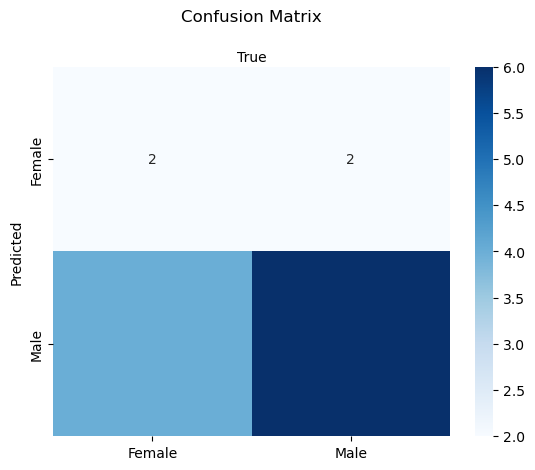

In [20]:
# Menghitung confusion matrix dari model
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)
# Labels untuk sumbu x dan y pada heatmap
labels = [0,1]

# Membuat subplot dan mengatur label sumbu x dan y
fig , ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Membuat heatmap dari confusion matrix dengan menggunakan seaborn
sns.heatmap(cnf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
# Menempatkan label sumbu x di atas heatmap
ax.xaxis.set_label_position("top")
# Memberi judul pada plot
plt.title("Confusion Matrix", y=1.1)
# Memberi label pada sumbu y dan x
plt.ylabel('Predicted')
plt.xlabel('True')


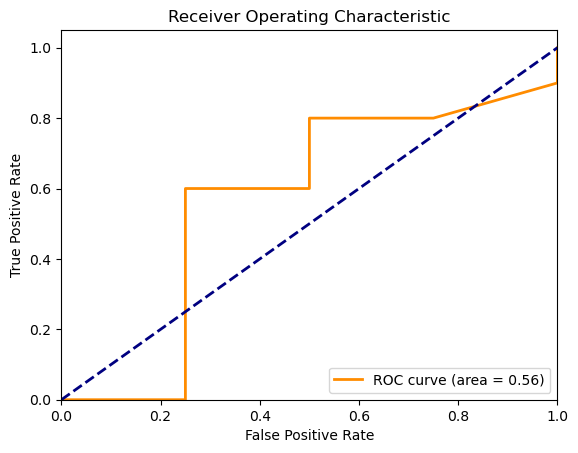

In [21]:
# Menghitung probabilitas prediksi untuk kelas positif
y_prob = model.predict_proba(X_test)[:, 1]
y_test_numeric = y_test.replace({'F': 0, 'M': 1})

# Menghitung nilai False Positive Rate (FPR), True Positive Rate (TPR), dan threshold
fpr, tpr, _ = roc_curve(y_test_numeric, y_prob)

# Menghitung nilai Area Under Curve (AUC) dari ROC
roc_auc = roc_auc_score(y_test_numeric, y_prob)

# Membuat plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [22]:
# Menghitung F1-score
f1 = f1_score(y_test, y_pred, pos_label='M')  # Untuk kelas 'M'
f2 = f1_score(y_test, y_pred, pos_label='F')  # Untuk kelas 'F'

print("F1-score M : ", f1)
print("F1-score F : ", f2)

F1-score M :  0.6666666666666665
F1-score F :  0.4


###### Menyimpan Model ke Joblib

In [23]:
# menyimpan model yang telah dilatih dengan joblib agar model bisa digunakan kapanpun tanpa perlu melatih ulang
joblib.dump(model, "tugas.joblib")

['tugas.joblib']